In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données (remplacez par votre fichier réel)
data = pd.read_csv("boulder_results.csv")


In [82]:

# Résumé des données
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9741 entries, 0 to 9740
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Competition Title  9741 non-null   object 
 1   Competition Date   9741 non-null   object 
 2   FIRST              9741 non-null   object 
 3   LAST               9741 non-null   object 
 4   Nation             9741 non-null   object 
 5   StartNr            9325 non-null   float64
 6   Rank               9741 non-null   int64  
 7   Qualification      5432 non-null   object 
 8   Qualification 1    2154 non-null   object 
 9   Qualification 2    2155 non-null   object 
 10  Semifinal          1524 non-null   object 
 11  Final              1458 non-null   object 
 12  Category           9741 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 989.4+ KB
None
           StartNr         Rank
count  9325.000000  9741.000000
mean    184.768150    32.414536
std    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


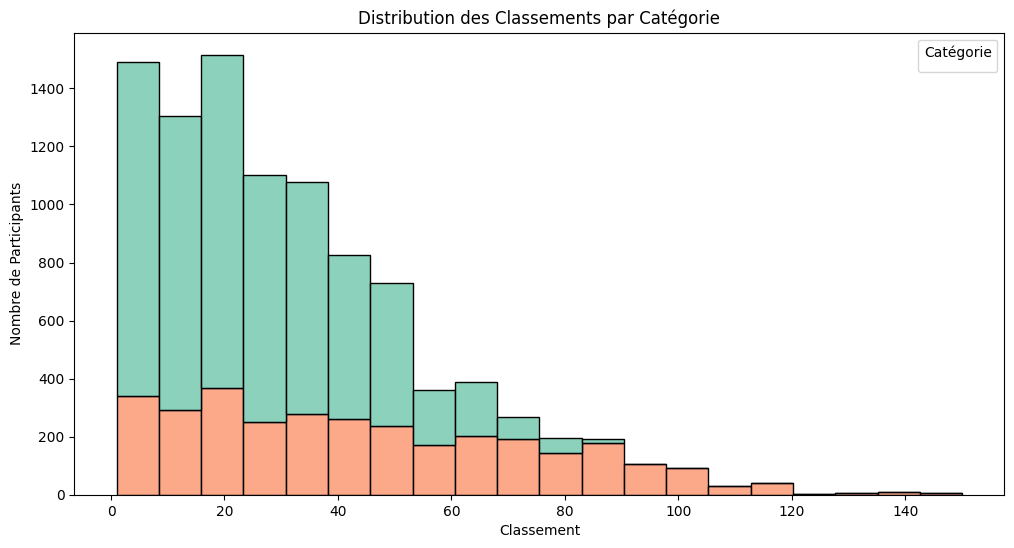

In [83]:
data['Rank'] = pd.to_numeric(data['Rank'], errors='coerce')
data['Qualification'] = pd.to_numeric(data['Qualification'], errors='coerce')

# 1. Distribution des classements par catégorie
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x="Rank", hue="Category", multiple="stack", bins=20, palette="Set2")
plt.title("Distribution des Classements par Catégorie")
plt.xlabel("Classement")
plt.ylabel("Nombre de Participants")
plt.legend(title="Catégorie")
plt.show()


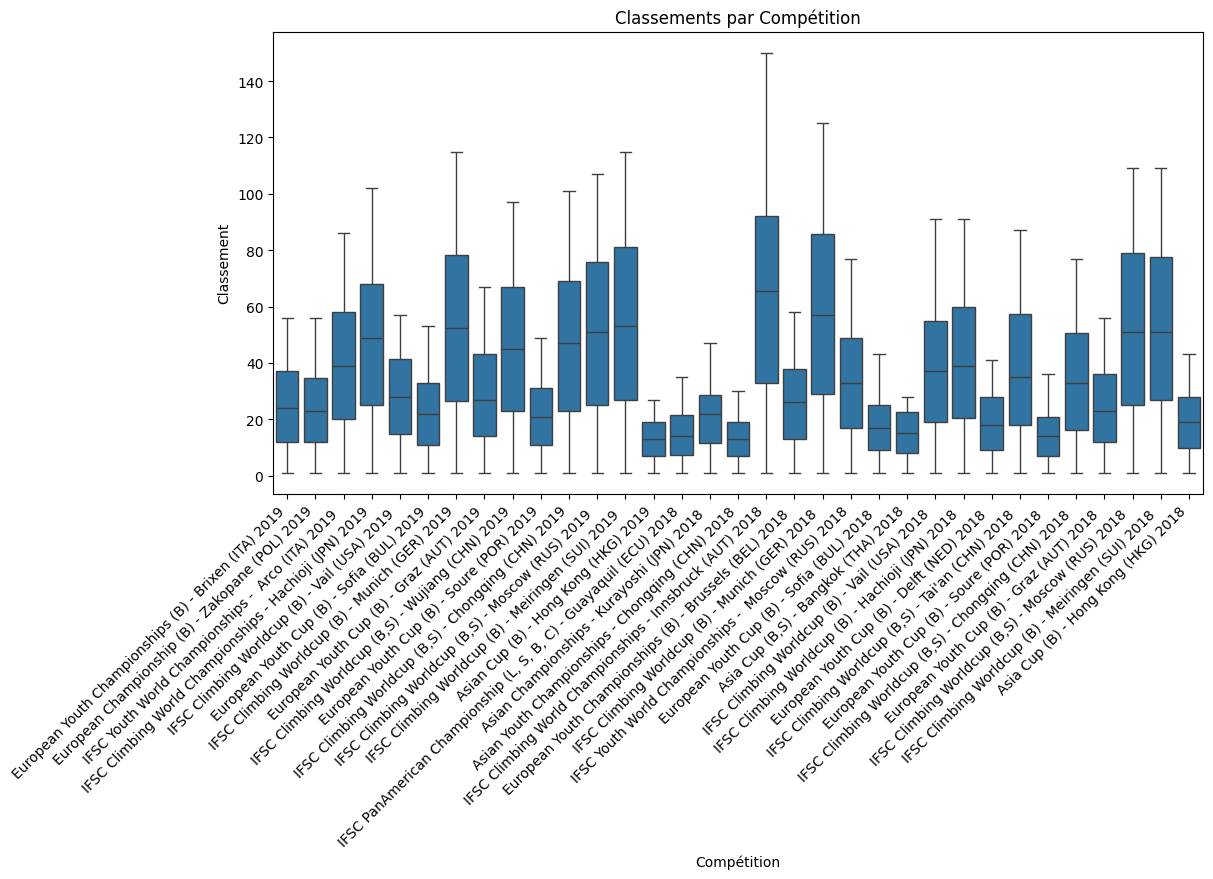

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="Competition Title", y="Rank")
plt.title("Classements par Compétition")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Compétition")
plt.ylabel("Classement")
plt.show()

C:\Users\gaill\AppData\Local\Temp\ipykernel_3152\1170809430.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data[data['Nation'].isin(top_nations)], x="Nation", y="Rank", palette="muted")


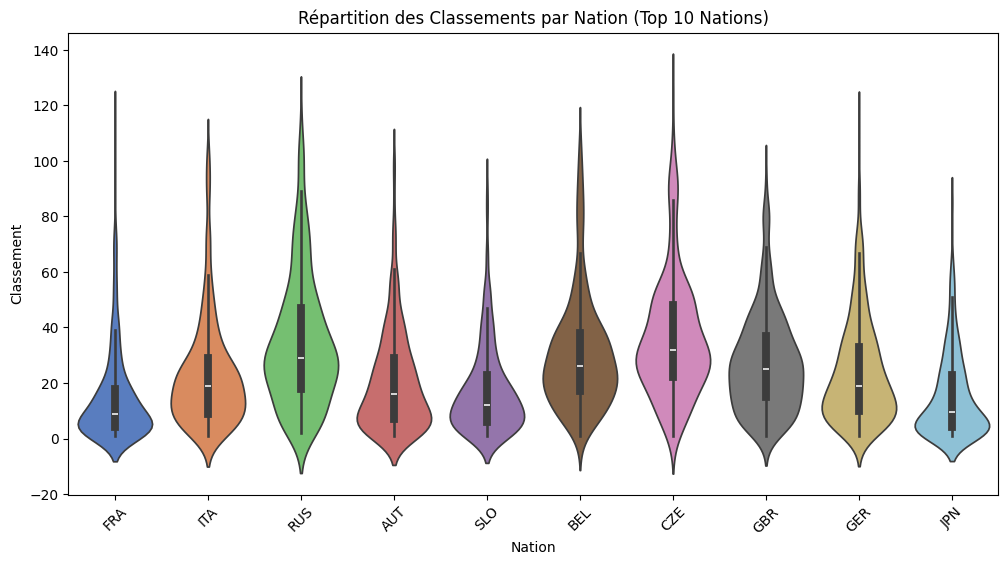

In [85]:
plt.figure(figsize=(12, 6))
top_nations = data['Nation'].value_counts().head(10).index  # Garder les 10 nations les plus représentées
sns.violinplot(data=data[data['Nation'].isin(top_nations)], x="Nation", y="Rank", palette="muted")
plt.title("Répartition des Classements par Nation (Top 10 Nations)")
plt.xticks(rotation=45)
plt.xlabel("Nation")
plt.ylabel("Classement")
plt.show()

In [86]:
num_participations = data.groupby(['FIRST', 'LAST', 'Nation'])['Rank'].count().reset_index(name="Num_Participations")

# Calculer la somme des classements par grimpeur
sum_ranks = data.groupby(['FIRST', 'LAST', 'Nation'])['Rank'].sum().reset_index(name="Sum_Ranks")

# Fusionner les deux DataFrames pour avoir à la fois la somme des classements et le nombre de participations
avg_rank = pd.merge(sum_ranks, num_participations, on=['FIRST', 'LAST', 'Nation'])

# Calculer la moyenne pondérée des classements (somme des classements / nombre de participations)
avg_rank['Weighted_Avg_Rank'] = avg_rank['Sum_Ranks'] / avg_rank['Num_Participations']

# Trier par moyenne pondérée des classements (meilleur = moyenne la plus basse)
top_global_avg = avg_rank.sort_values(by="Weighted_Avg_Rank", ascending=True).head(10)

# Afficher le tableau des meilleurs grimpeurs sur la base de la moyenne pondérée
print("Top des grimpeurs selon leur moyenne pondérée de classement :")
print(top_global_avg[['FIRST', 'LAST', 'Nation', 'Weighted_Avg_Rank', 'Num_Participations']])

Top des grimpeurs selon leur moyenne pondérée de classement :
       FIRST       LAST Nation  Weighted_Avg_Rank  Num_Participations
172       Ao   YURIKUSA    JPN           1.000000                   2
1310  Oriane    BERTONE    FRA           1.000000                   8
1563   Sohta    AMAGASA    JPN           1.000000                   2
732    Janja   GARNBRET    SLO           1.090909                  11
1454     Ryu   NAKAGAWA    JPN           2.000000                   2
824    Junta  SEKIGUCHI    JPN           2.000000                   2
36     Akiyo    NOGUCHI    JPN           2.285714                  14
1337    Paul      JENFT    FRA           2.333333                  18
1451   Ryoei      NUKUI    JPN           2.500000                   4
1155    Miho     NONAKA    JPN           2.916667                  12


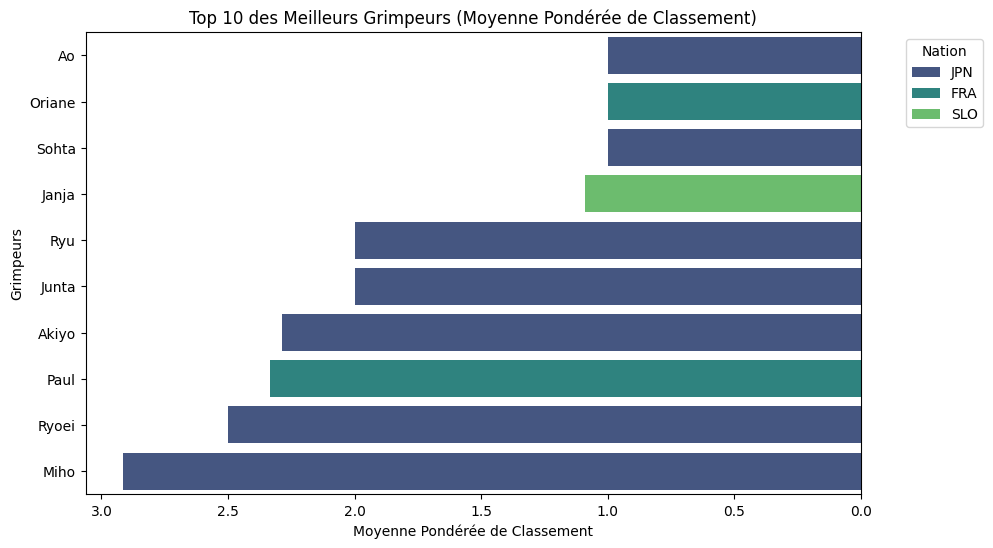

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_global_avg, x="Weighted_Avg_Rank", y="FIRST", hue="Nation", dodge=False, palette="viridis")
plt.title("Top 10 des Meilleurs Grimpeurs (Moyenne Pondérée de Classement)")
plt.xlabel("Moyenne Pondérée de Classement")
plt.ylabel("Grimpeurs")
plt.gca().invert_xaxis()  # Inverser l'axe des classements (1 est le meilleur)
plt.legend(title="Nation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### TRAITEMENT DES DONNEES

Je supprime les colonnes qui ne sont pas utiles ainsi que les lignes qui ont des valeurs à null

In [88]:
print("Valeurs manquantes dans chaque colonne :")
print(data.isnull().sum())

missing_data = data.isnull().sum()
columns_to_drop = missing_data[missing_data > 1000].index
data = data.drop(columns=columns_to_drop)
data = data.drop(columns="StartNr")

print("Colonnes restantes après suppression :")
print(data.columns)

Valeurs manquantes dans chaque colonne :
Competition Title       0
Competition Date        0
FIRST                   0
LAST                    0
Nation                  0
StartNr               416
Rank                    0
Qualification        9741
Qualification 1      7587
Qualification 2      7586
Semifinal            8217
Final                8283
Category                0
dtype: int64
Colonnes restantes après suppression :
Index(['Competition Title', 'Competition Date', 'FIRST', 'LAST', 'Nation',
       'Rank', 'Category'],
      dtype='object')


In [89]:
print("Valeurs manquantes dans chaque colonne :")
print(data.isnull().sum())

Valeurs manquantes dans chaque colonne :
Competition Title    0
Competition Date     0
FIRST                0
LAST                 0
Nation               0
Rank                 0
Category             0
dtype: int64


In [90]:
data = data.dropna()
data.isnull().sum()


Competition Title    0
Competition Date     0
FIRST                0
LAST                 0
Nation               0
Rank                 0
Category             0
dtype: int64

On supprime les données incohérente, ici si le rank et inferieur à 1

In [91]:
data = data[data['Rank'] >= 1]
print("\nDonnées après suppression des valeurs aberrantes :")
print(data[['Rank']].describe())


Données après suppression des valeurs aberrantes :
              Rank
count  9741.000000
mean     32.414536
std      24.472429
min       1.000000
25%      14.000000
50%      27.000000
75%      45.000000
max     150.000000


On s'assure que rank sois bien un nombre à chaque fois

In [92]:
data['Rank'] = pd.to_numeric(data['Rank'], errors='coerce')

print("\nTypes de données après conversion :")
print(data.dtypes)


Types de données après conversion :
Competition Title    object
Competition Date     object
FIRST                object
LAST                 object
Nation               object
Rank                  int64
Category             object
dtype: object


On supprime les doublons en gardant la première occurrence

In [93]:
print("\nNombre de doublons dans les données :")
print(data.duplicated().sum())

# Suppression des doublons
data = data.drop_duplicates()

# Vérification après suppression des doublons
print("\nNombre de doublons après nettoyage :")
print(data.duplicated().sum())


Nombre de doublons dans les données :
3272

Nombre de doublons après nettoyage :
0


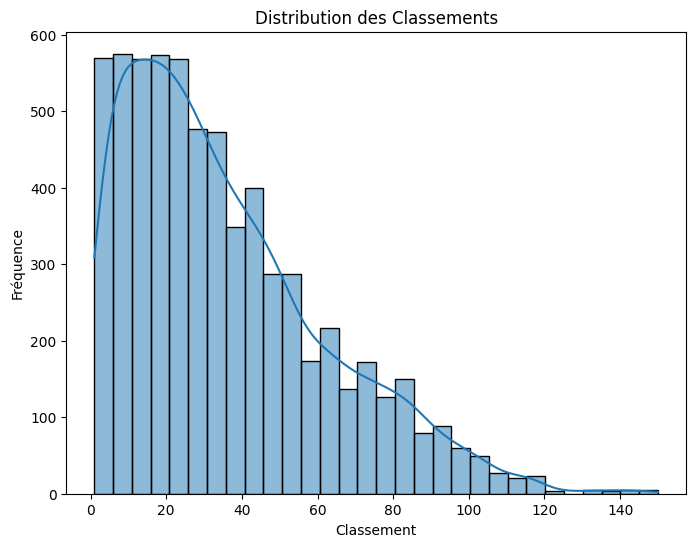

In [94]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Rank'], bins=30, kde=True)
plt.title('Distribution des Classements')
plt.xlabel('Classement')
plt.ylabel('Fréquence')
plt.show()


In [95]:
# Utilisation de pd.factorize() pour convertir les chaînes de caractères en valeurs numériques
data['FIRST_num'] = pd.factorize(data['FIRST'])[0] + 1  # Ajout de 1 pour commencer à partir de 1
data['LAST_num'] = pd.factorize(data['LAST'])[0] + 1
data['Nation_num'] = pd.factorize(data['Nation'])[0] + 1
data['Competition Title_num'] = pd.factorize(data['Competition Title'])[0] + 1
data['Competition Date_num'] = pd.factorize(data['Competition Date'])[0] + 1

data_numeric = data.select_dtypes(include=['float64', 'int64'])


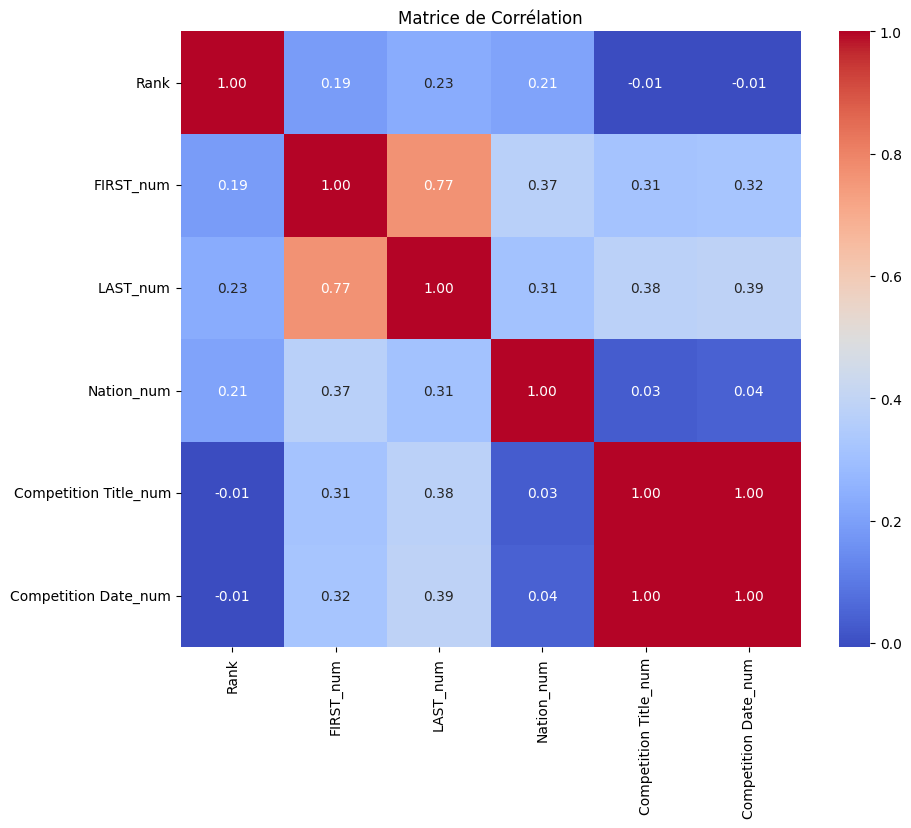

In [96]:
corr_matrix = data_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()


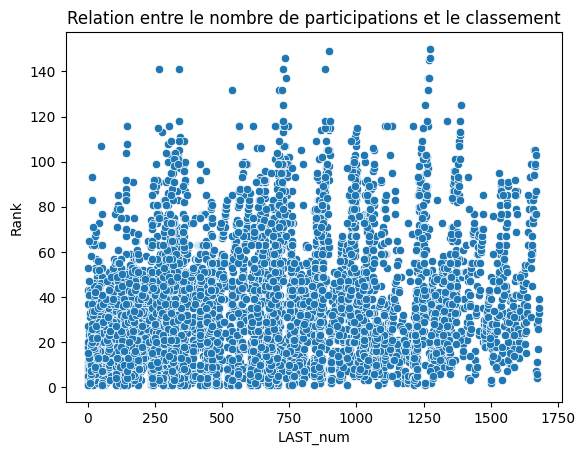

In [102]:
sns.scatterplot(x='LAST_num', y='Rank', data=data)
plt.title('Relation entre le nombre de participations et le classement')
plt.show()

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['LAST_num', 'Rank']] = scaler.fit_transform(data[['LAST_num', 'Rank']])

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sélection des variables prédictives et de la variable cible
X = data[['LAST_num', 'Nation_num', 'FIRST_num']]  # Variables indépendantes
y = data['Rank']  # Variable cible

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.9810903465722963


In [106]:
print(f"Variance du Rank : {data['Rank'].var()}")

Variance du Rank : 1.0001546072974645


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Séparer les caractéristiques (features) et la cible (target)
features = data_numeric[['FIRST_num', 'LAST_num', 'Nation_num']]
target = data_numeric['Rank']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Vérification
print(f"Taille de l'ensemble d'entraînement : {len(X_train)}")
print(f"Taille de l'ensemble de test : {len(X_test)}")

Taille de l'ensemble d'entraînement : 5175
Taille de l'ensemble de test : 1294


In [110]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Évaluation du modèle sur l'ensemble de test
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error sur l'ensemble de test : {mse:.2f}")

Mean Squared Error sur l'ensemble de test : 429.06


In [116]:
def predict_rank(firstname, lastname, nation, model, encoder_first, encoder_last, encoder_nation):
    """
    Predit le rang potentiel d'une personne en utilisant les caractéristiques entraînées.
    """
    # Convertir les données textuelles en numériques
    first_num = encoder_first.transform([firstname])[0]
    last_num = encoder_last.transform([lastname])[0]
    nation_num = encoder_nation.transform([nation])[0]
    
    # Créer le vecteur de caractéristiques (basé sur 3 colonnes)
    features = [[first_num, last_num, nation_num]]
    
    # Prédire le Rank
    predicted_rank = model.predict(features)[0]
    
    return round(predicted_rank, 2)

In [117]:
from sklearn.preprocessing import LabelEncoder

encoder_first = LabelEncoder()
encoder_last = LabelEncoder()
encoder_nation = LabelEncoder()

# Adapter les encodeurs sur les colonnes correspondantes
encoder_first.fit(data['FIRST'])
encoder_last.fit(data['LAST'])
encoder_nation.fit(data['Nation'])

LabelEncoder()

In [128]:
firstname = "Oriane"
lastname = "BERTONE"
nation = "FRA"

predicted_rank = predict_rank(
    firstname, lastname, nation,
    model, encoder_first, encoder_last, encoder_nation
)

print(f"Le rang potentiel de {firstname} {lastname} ({nation}) est : {predicted_rank}")

c:\Users\gaill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Le rang potentiel de Oriane BERTONE (FRA) est : 35.56


In [ ]:
import matplotlib.pyplot as plt

# Importance des caractéristiques
importances = model.feature_importances_
features = ['FIRST_num', 'LAST_num']  # Ajoutez toutes vos features
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Importance des caractéristiques')
plt.show()